### **Prediction using Unsupervised ML**

● From the given ‘Iris’ dataset, predict the optimum number of clusters
and represent it visually.


In [ ]:
# Mounting with google drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
# Importing libraries
import pandas
import numpy
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn
from termcolor import colored
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
# Importing the dataset
data = pandas.read_csv('/content/gdrive/My Drive/Datasets/GRIP datasets/Task- 2_Iris.csv', engine='python')
# Shape of dataset
data.shape

(150, 6)

In [ ]:
data.index

RangeIndex(start=0, stop=150, step=1)

In [ ]:
# Columns in the dataframe
data.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [ ]:
# Viewing first 3 rows from dataframe
data.head(3)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa


In [ ]:
# Data cleaning
# Checking null values
data.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [ ]:
# Checking duplicate values
data.duplicated().sum()

0

In [ ]:
# Information about dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [ ]:
# Description of dataframe
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


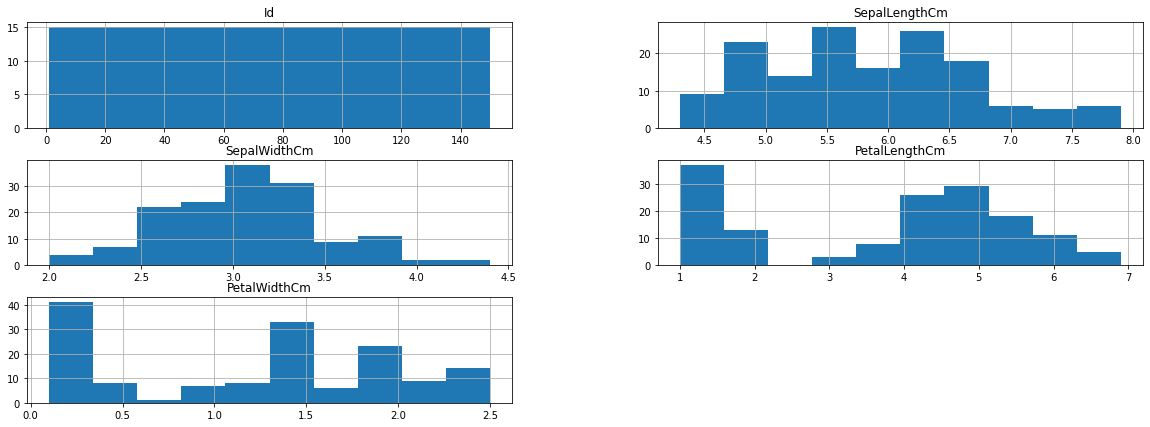

In [ ]:
# Histogram plot of dataframe
data.hist(figsize= (20, 7))
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


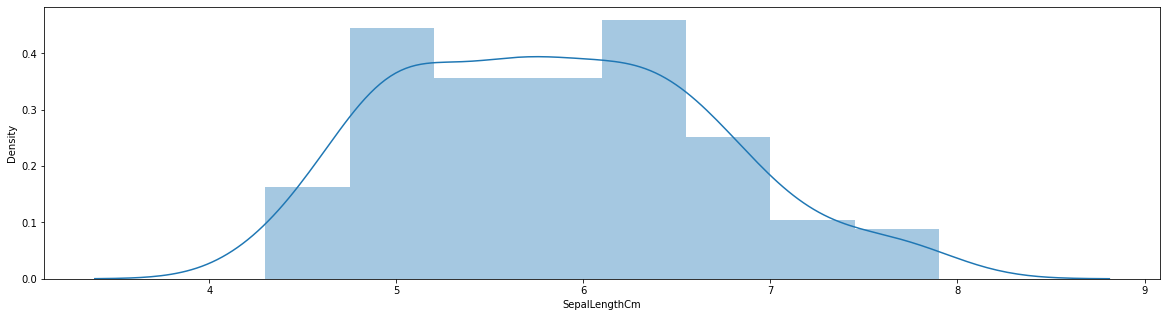

In [ ]:
# Distribution plot for SepalLengthCm variable in the dataframe
# kde (Kernel Density Estimate) : It gives us probability density function
# bins denotes in how many parts our data is distributed
plt.figure(figsize= (20,5))
seaborn.distplot(data['SepalLengthCm'], kde= True)
plt.show()

In [ ]:
# Number of unique vaules in both columns
data.nunique()

Id               150
SepalLengthCm     35
SepalWidthCm      23
PetalLengthCm     43
PetalWidthCm      22
Species            3
dtype: int64

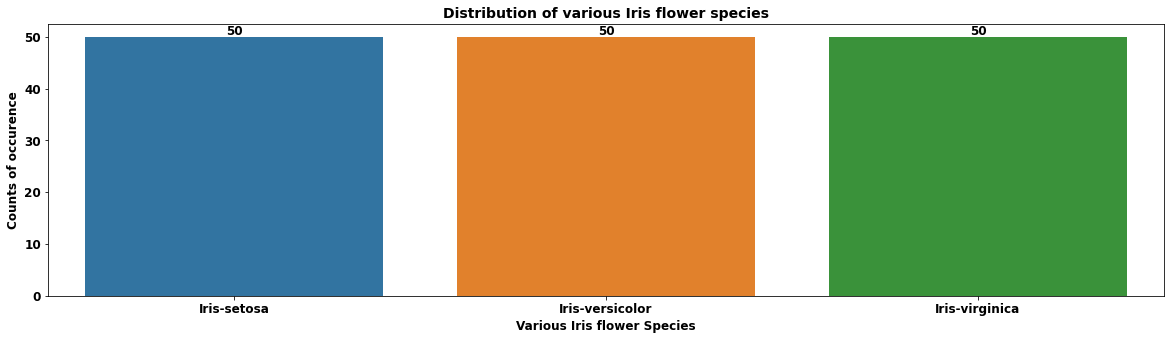

In [ ]:
# Countplot for Species column
plt.figure(figsize= (20, 5))
axes= seaborn.countplot(x= 'Species', data= data)
plt.title('Distribution of various Iris flower species', fontsize= 14, fontweight= 'bold')
plt.xlabel('Various Iris flower Species', fontweight= 'bold', fontsize= 12)
plt.ylabel('Counts of occurence', fontweight= 'bold', fontsize= 12)
plt.xticks(fontweight= 'bold', fontsize= 12)
plt.yticks(fontweight= 'bold', fontsize= 12)
for a in axes.patches:
  axes.text( a.get_x()+ a.get_width()/2 , a.get_height() + 0.5 , a.get_height(), horizontalalignment='center', fontweight= 'bold', fontsize= 12 )
plt.show()

In [ ]:
# Correlation matrix
correlation= data.corr()
correlation

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


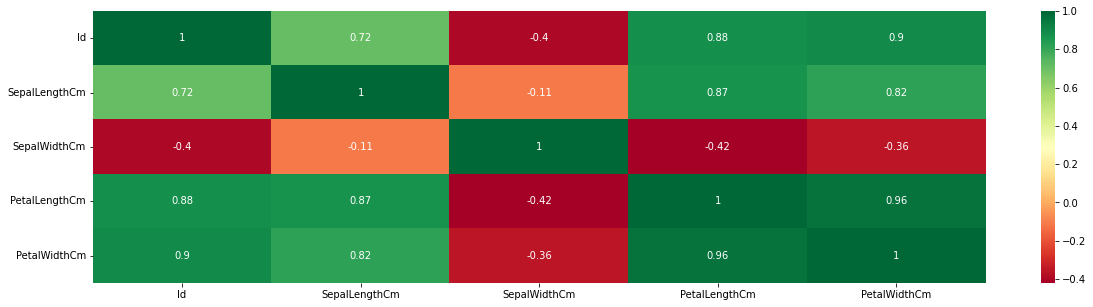

In [ ]:
# Correlation heatmap
plt.figure(figsize= (20, 5))
seaborn.heatmap(correlation, annot= True, cmap= 'RdYlGn')
plt.show()

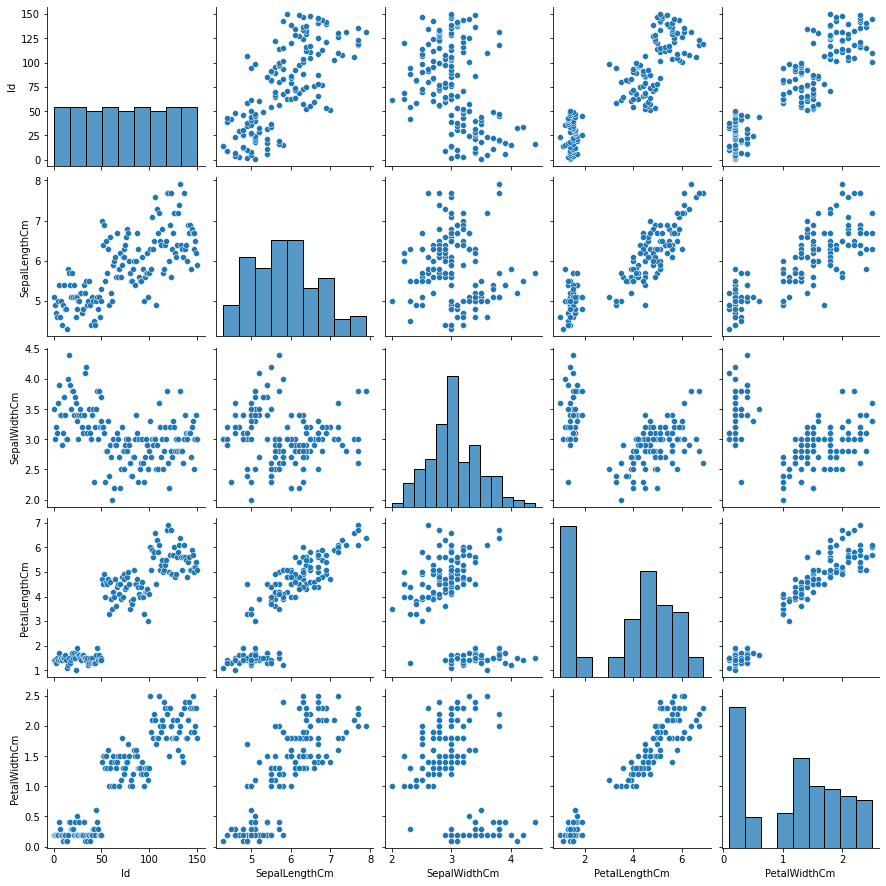

In [ ]:
# Seaborn pairplot
seaborn.pairplot(data)
plt.show()

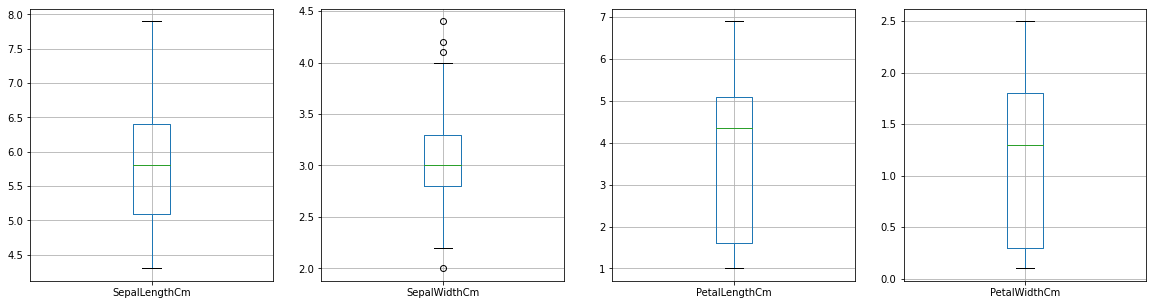

In [ ]:
# Boxplot of dataframe : to show outliers
plt.figure(figsize= (20, 5))
plt.subplot(1, 4, 1)
data.boxplot('SepalLengthCm')
plt.subplot(1, 4, 2)
data.boxplot('SepalWidthCm')
plt.subplot(1, 4, 3)
data.boxplot('PetalLengthCm')
plt.subplot(1, 4, 4)
data.boxplot('PetalWidthCm')
plt.show()

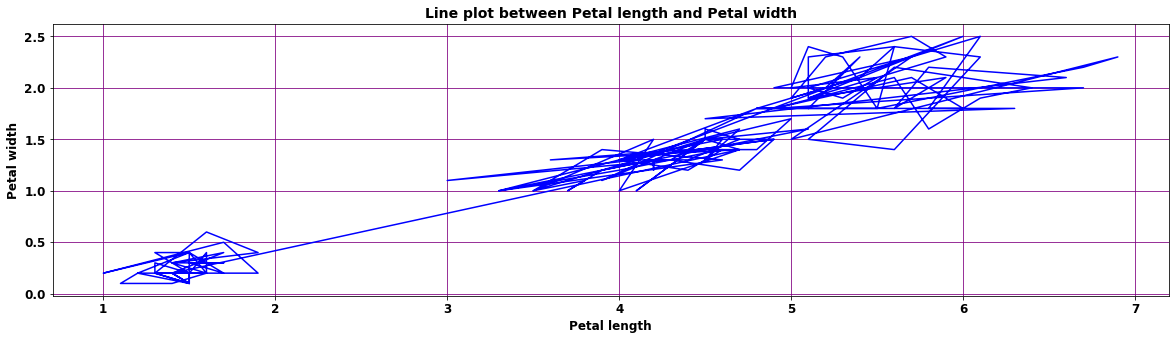

In [ ]:
# Line plot between PetalLengthCm and PetalWidthCm columns
plt.figure(figsize= (20, 5))
plt.plot(data['PetalLengthCm'], data['PetalWidthCm'], color= 'blue')
plt.title('Line plot between Petal length and Petal width', fontsize= 14, fontweight= 'bold')
plt.xlabel('Petal length', fontsize= 12, fontweight= 'bold')
plt.ylabel('Petal width', fontsize= 12, fontweight= 'bold')
plt.xticks(fontsize= 12, fontweight= 'bold')
plt.yticks(fontsize= 12, fontweight= 'bold')
plt.grid(color= 'purple')
plt.show()

In [ ]:
# Predicting clusters from Kmeans
kmeans= KMeans(n_clusters= 3)
predicted_cluster = kmeans.fit_predict(data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']])
predicted_cluster

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

In [ ]:
# Value count for each type of cluster
data['cluster']= predicted_cluster
data['cluster'].value_counts().sort_values()

2    38
1    50
0    62
Name: cluster, dtype: int64

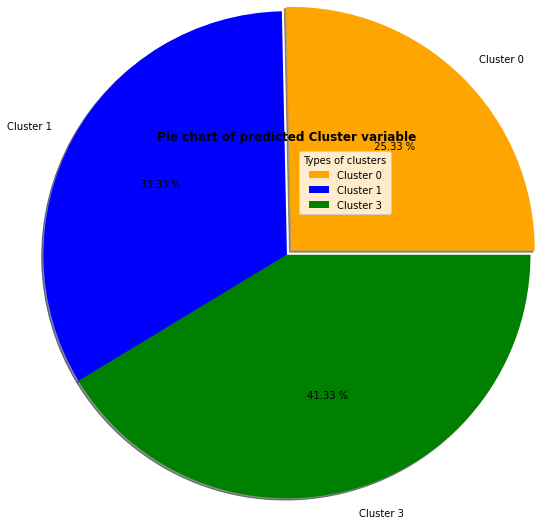

In [ ]:
# Pie chart of predicted Cluster variable
labels= ['Cluster 0', 'Cluster 1', 'Cluster 3']
features= [38, 50, 62]
explode= [0.07, 0, 0]
plt.title('Pie chart of predicted Cluster variable', fontsize= 12, fontweight= 'bold')
plt.pie(features, labels= labels, radius= 2.8, startangle= 0, explode= explode, shadow= True, colors= ['orange', 'blue', 'green'], autopct= '% 0.2f %%')
plt.legend(title= 'Types of clusters')
plt.show()

In [ ]:
# Viewing Cluster centers
cluster_centers= kmeans.cluster_centers_.round(decimals= 3)
cluster_centers

array([[5.902, 2.748, 4.394, 1.434],
       [5.006, 3.418, 1.464, 0.244],
       [6.85 , 3.074, 5.742, 2.071]])

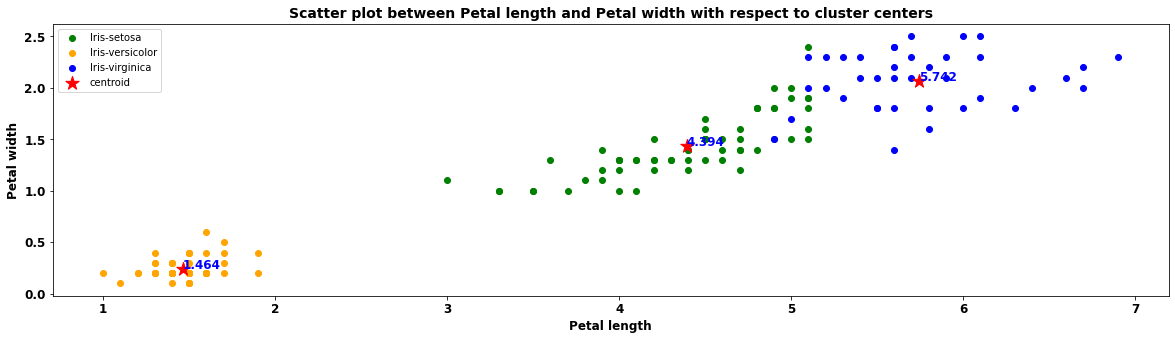

In [ ]:
# Scatter plot between PetalLength and PetalWidth with respect to cluster centers
plt.figure(figsize= (20, 5))
plt.scatter( data[data['cluster']==0]['PetalLengthCm'] , data[data['cluster']==0]['PetalWidthCm'] , color='green', label='Iris-setosa')
plt.scatter( data[data['cluster']==1]['PetalLengthCm'] , data[data['cluster']==1]['PetalWidthCm'] , color='orange', label='Iris-versicolor')
plt.scatter( data[data['cluster']==2]['PetalLengthCm'] , data[data['cluster']==2]['PetalWidthCm'] , color='blue', label='Iris-virginica')
plt.scatter(cluster_centers[:,2] , cluster_centers[:,3], color='red', marker='*',s= 200, label='centroid' )
plt.title('Scatter plot between Petal length and Petal width with respect to cluster centers', fontsize= 14, fontweight= 'bold')
plt.xlabel('Petal length', fontsize= 12, fontweight= 'bold')
plt.ylabel('Petal width', fontsize= 12, fontweight= 'bold')
plt.xticks(fontsize= 12, fontweight= 'bold')
plt.yticks(fontsize= 12, fontweight= 'bold')
for x, y in zip(cluster_centers[:,2] , cluster_centers[:,3]):
  plt.text(x, y, str(x), fontsize= 12, fontweight= 'bold', color= 'blue' )
plt.legend()
plt.show()

In [ ]:
# sse= Sum of squared error
sse = []
kmeans_range = range(1, 11)
for n in kmeans_range:
    kmeans = KMeans(n_clusters= n)
    kmeans.fit(data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']])
    sse.append(kmeans.inertia_)
print('Sum of squared errors :', numpy.round(sse, 3) )

Sum of squared errors : [680.824 152.369  78.941  57.345  46.536  38.931  34.197  30.747  27.994
  26.623]


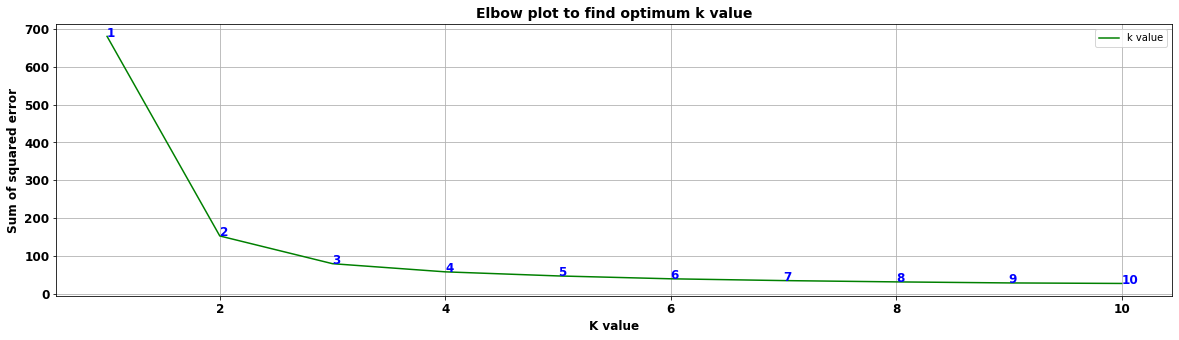

In [ ]:
# Elbow plot to find optimum k value
plt.figure(figsize= (20, 5))
plt.plot(kmeans_range, sse, label= 'k value', color= 'green')
plt.title('Elbow plot to find optimum k value', fontsize= 14, fontweight= 'bold')
plt.xlabel('K value', fontsize= 12, fontweight= 'bold')
plt.ylabel('Sum of squared error', fontsize= 12, fontweight= 'bold')
plt.xticks(fontsize= 12, fontweight= 'bold')
plt.yticks(fontsize= 12, fontweight= 'bold')
plt.legend()
plt.grid()
for x, y in zip(kmeans_range, sse):
  plt.text(x, y, str(x), fontsize= 12, fontweight= 'bold', color= 'blue' )
plt.show()

### **In Elbow method, the optimum number of clusters is where the elbow occurs. This is when within the clusters sum of squares doesn't decrease significantly with every iteration. So, the optimal value of k is 3.**

In [ ]:
# Splitting data into training and testing sets
x= data[['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']]
y= data[['Species']]
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.1, random_state= 0)
print('Independent training set shape is :', x_train.shape)
print('Independent testing set shape is :', x_test.shape)
print('Dependent training set shape is :', y_train.shape)
print('Dependent testing set shape is :', y_test.shape)

Independent training set shape is : (135, 4)
Independent testing set shape is : (15, 4)
Dependent training set shape is : (135, 1)
Dependent testing set shape is : (15, 1)


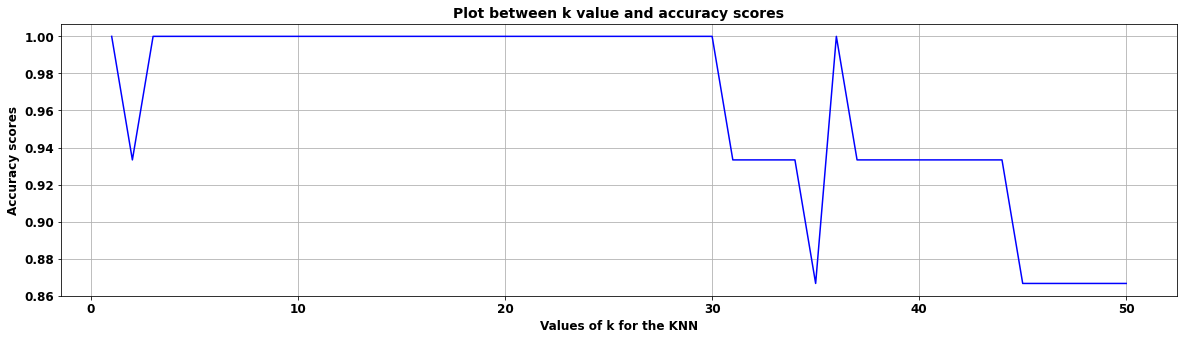

In [ ]:
# Line plot between k value and accuracy scores
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize= (20, 5))
scores_list= []
for k in range(1, 51):
  knn= KNeighborsClassifier(n_neighbors= k)
  knn.fit(x_train, y_train)
  y_pred= knn.predict(x_test)
  score= accuracy_score(y_test, y_pred)
  scores_list.append(score)
plt.plot(numpy.arange(1, 51), scores_list, color= 'blue')
plt.title('Plot between k value and accuracy scores', fontsize= 14, fontweight= 'bold')
plt.xlabel('Values of k for the KNN', fontsize= 12, fontweight= 'bold')
plt.ylabel('Accuracy scores', fontsize= 12, fontweight= 'bold')
plt.xticks(fontsize= 12, fontweight= 'bold')
plt.yticks(fontsize= 12, fontweight= 'bold')
plt.grid()
plt.show()

In [ ]:
# Fitting our model with Logistic Regression and checking Confusion matrix and Classification report
lor= LogisticRegression()
lor.fit(x_train, y_train)
y_pred= lor.predict(x_test)
lor_accuracy= ((accuracy_score(y_test, y_pred)) * 100).round(decimals= 3)
print('Training set accuracy acore % is : ', ((accuracy_score(y_train, lor.predict(x_train))) * 100).round(decimals= 3) )
print('Testing set accuracy acore % is : ', lor_accuracy)
print('Confusion matrix is :', '\n', confusion_matrix(y_test, y_pred))
print()
print('Classification report is :', '\n',  classification_report(y_test, y_pred))

Training set accuracy acore % is :  97.037
Testing set accuracy acore % is :  100.0
Confusion matrix is : 
 [[3 0 0]
 [0 8 0]
 [0 0 4]]

Classification report is : 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         3
Iris-versicolor       1.00      1.00      1.00         8
 Iris-virginica       1.00      1.00      1.00         4

       accuracy                           1.00        15
      macro avg       1.00      1.00      1.00        15
   weighted avg       1.00      1.00      1.00        15



In [ ]:
# Fitting our model with Decision Tree Classifier and checking Confusion matrix and Classification report
dtc= DecisionTreeClassifier()
dtc.fit(x_train, y_train)
y_pred= dtc.predict(x_test)
dtc_accuracy= ((accuracy_score(y_test, y_pred)) * 100).round(decimals= 3)
print('Training set accuracy acore % is : ', ((accuracy_score(y_train, dtc.predict(x_train))) * 100).round(decimals= 3) )
print('Testing set accuracy acore % is : ', dtc_accuracy)
print('Confusion matrix is :', '\n', confusion_matrix(y_test, y_pred))
print()
print('Classification report is :', '\n',  classification_report(y_test, y_pred))

Training set accuracy acore % is :  100.0
Testing set accuracy acore % is :  100.0
Confusion matrix is : 
 [[3 0 0]
 [0 8 0]
 [0 0 4]]

Classification report is : 
                  precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         3
Iris-versicolor       1.00      1.00      1.00         8
 Iris-virginica       1.00      1.00      1.00         4

       accuracy                           1.00        15
      macro avg       1.00      1.00      1.00        15
   weighted avg       1.00      1.00      1.00        15



[Text(558.0, 498.3, 'X[3] <= 0.8\ngini = 0.666\nsamples = 135\nvalue = [47, 42, 46]'), Text(472.15384615384613, 407.70000000000005, 'gini = 0.0\nsamples = 47\nvalue = [47, 0, 0]'), Text(643.8461538461538, 407.70000000000005, 'X[3] <= 1.75\ngini = 0.499\nsamples = 88\nvalue = [0, 42, 46]'), Text(343.38461538461536, 317.1, 'X[2] <= 4.95\ngini = 0.162\nsamples = 45\nvalue = [0, 41, 4]'), Text(171.69230769230768, 226.5, 'X[3] <= 1.65\ngini = 0.049\nsamples = 40\nvalue = [0, 39, 1]'), Text(85.84615384615384, 135.89999999999998, 'gini = 0.0\nsamples = 39\nvalue = [0, 39, 0]'), Text(257.53846153846155, 135.89999999999998, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'), Text(515.0769230769231, 226.5, 'X[3] <= 1.55\ngini = 0.48\nsamples = 5\nvalue = [0, 2, 3]'), Text(429.23076923076917, 135.89999999999998, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]'), Text(600.9230769230769, 135.89999999999998, 'X[0] <= 6.95\ngini = 0.444\nsamples = 3\nvalue = [0, 2, 1]'), Text(515.0769230769231, 45.29999999999

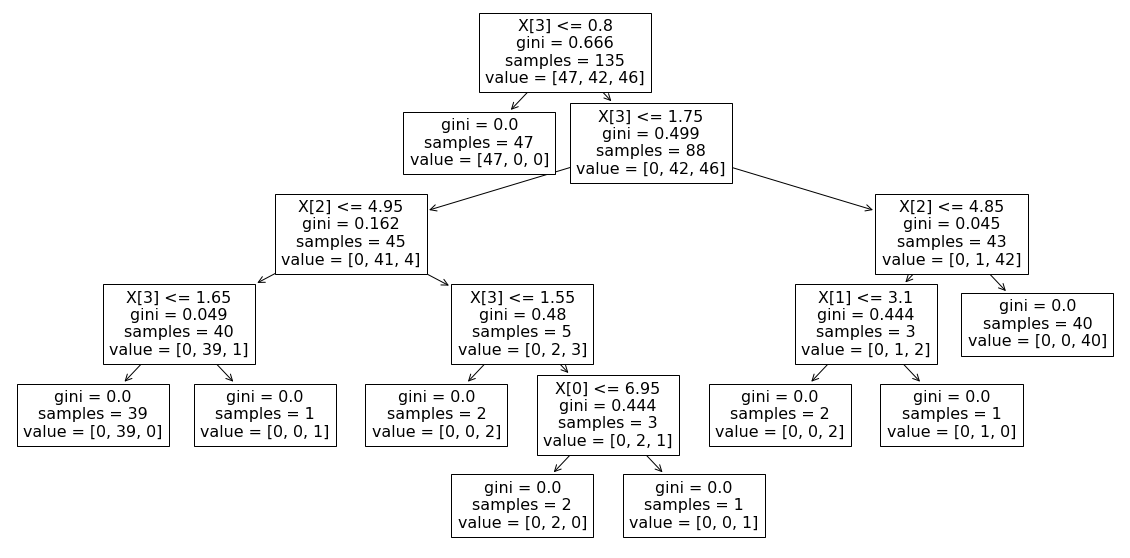

In [ ]:
# Creating a Decision Tree :
dtree = dtc.fit(x_train, y_train)
plt.figure( figsize = (20, 10))
print(tree.plot_tree( dtree ))

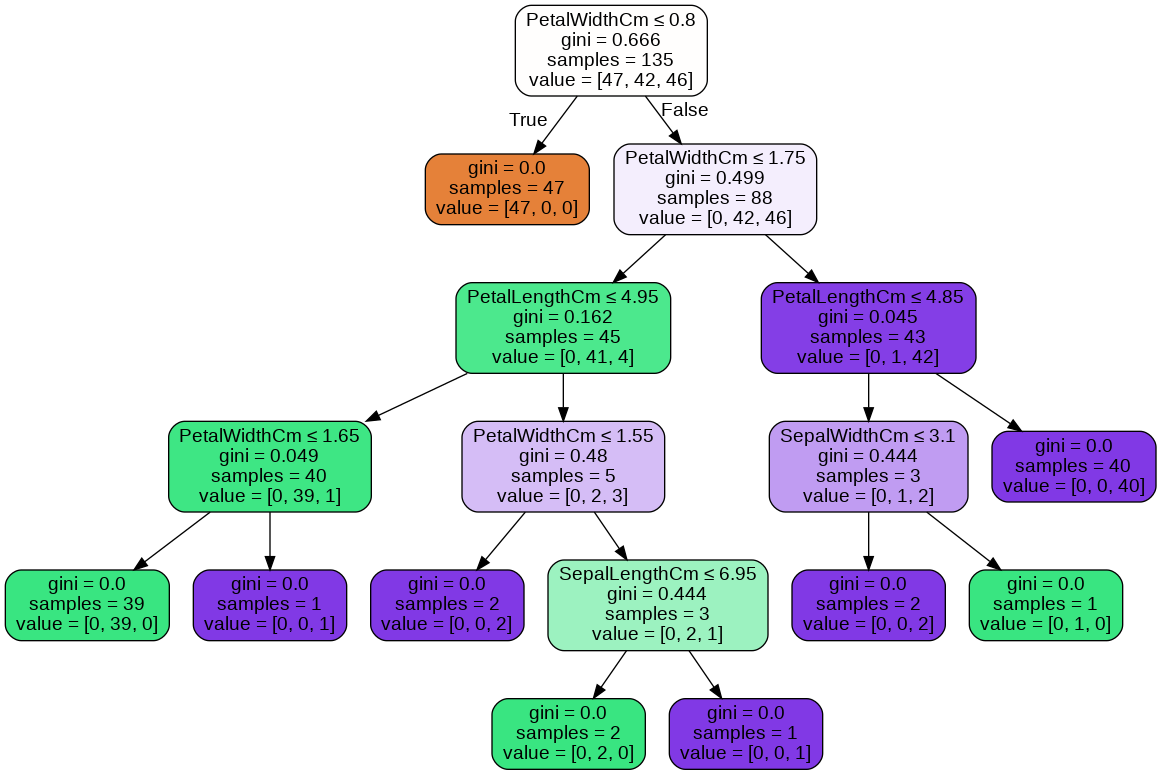

In [ ]:
# Importing necessary libraries for graph viz
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
# Visualizing the graph
dot_data = StringIO()
export_graphviz(dtree, out_file=dot_data, feature_names= ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'], filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [ ]:
input

[[5.4, 3.7, 1.5, 0.2]]

In [ ]:
# Taking out predictions from the model with known values
Sepal_length= x['SepalLengthCm'][10]
Sepal_width= x['SepalWidthCm'][10]
Petal_length= x['PetalLengthCm'][10]
Petal_width= x['PetalWidthCm'][10]
input= [[Sepal_length, Sepal_width, Petal_length, Petal_width]]
prediction= dtc.predict(input)
print('Value of Species from the dataframe is : ', y['Species'][10])
print('Predicted value of Species is : ', prediction)

Value of Species from the dataframe is :  Iris-setosa
Predicted value of Species is :  ['Iris-setosa']


In [ ]:
# Taking out predictions from the model with random values
Sepal_length= 5.8
Sepal_width= 2.7
Petal_length= 4.4
Petal_width= 1.5
input= [[Sepal_length, Sepal_width, Petal_length, Petal_width]]
prediction= dtc.predict(input)
print('Predicted value of Species is : ', prediction)

Predicted value of Species is :  ['Iris-versicolor']


In [ ]:
# Taking out predictions from the model with random values
Sepal_length= 6.4
Sepal_width= 3.1
Petal_length= 5.8
Petal_width= 2.8
input= [[Sepal_length, Sepal_width, Petal_length, Petal_width]]
prediction= dtc.predict(input)
print('Predicted value of Species is : ', prediction)

Predicted value of Species is :  ['Iris-virginica']


In [ ]:
print(colored('Thank you for reading this !', 'green', attrs= ['bold']) )

Thank you for reading this !
